<h1 align="center">Title: Different Algorithm Implementaion and Evaluation</h1>
<a href="https://colab.research.google.com/github/muhammad-mobeen/Different-Algorithm-Implementaion-and-Evaluation/blob/main/MLAssignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<p>Name: Muhammad Mobeen<br>
Reg No: 200901097<br>
BS-CS-01(B)<br>
Machine Learning Assignment #03<br>
Github URL: <a href="https://github.com/muhammad-mobeen/Different-Algorithm-Implementaion-and-Evaluation">github.com/muhammad-mobeen/Different-Algorithm-Implementaion-and-Evaluation</a><br>
Submitted to Mam Amara</p>

# Importing Dependencies

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Reading Data

In [39]:
data = pd.read_csv('diabetes.csv')

# Observing & Visualizing Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Performing EDA & Visualizations

## 1. Univariate Analysis



From following graphs we can see that the data is imbalance

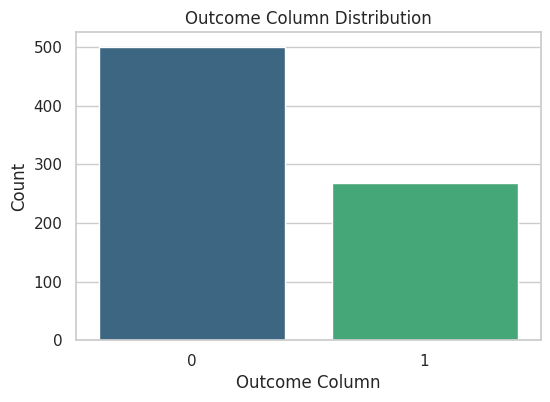

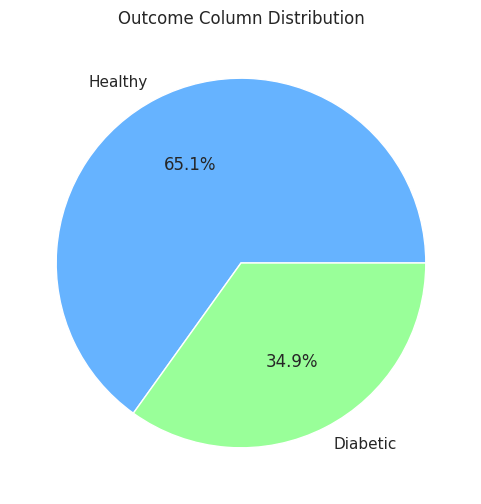

Diabetic: 268
Healthy: 500


In [8]:
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]
sns.set(style="whitegrid")

# Create a count plot for the binary column
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data, palette='viridis')

# Add labels and title
plt.title('Outcome Column Distribution')
plt.xlabel('Outcome Column')
plt.ylabel('Count')

# Show the plot
plt.show()

# Count the occurrences of each value in the binary column
binary_counts = data['Outcome'].value_counts()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(binary_counts, labels=['Healthy', 'Diabetic'], autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'])

# Add title
plt.title('Outcome Column Distribution')

# Show the plot
plt.show()

print("Diabetic:", len(D))
print("Healthy:", len(H))

We have observed that there are alot of 0 values in the dataset, however it's not possible since these features can never be exactly 0 only if they are missing vlaues otherwise. So we will deal such values as missing values.

**Note: We will ignore the 'Pregnancies' and 'Outcome' column since they can have a 0 value**

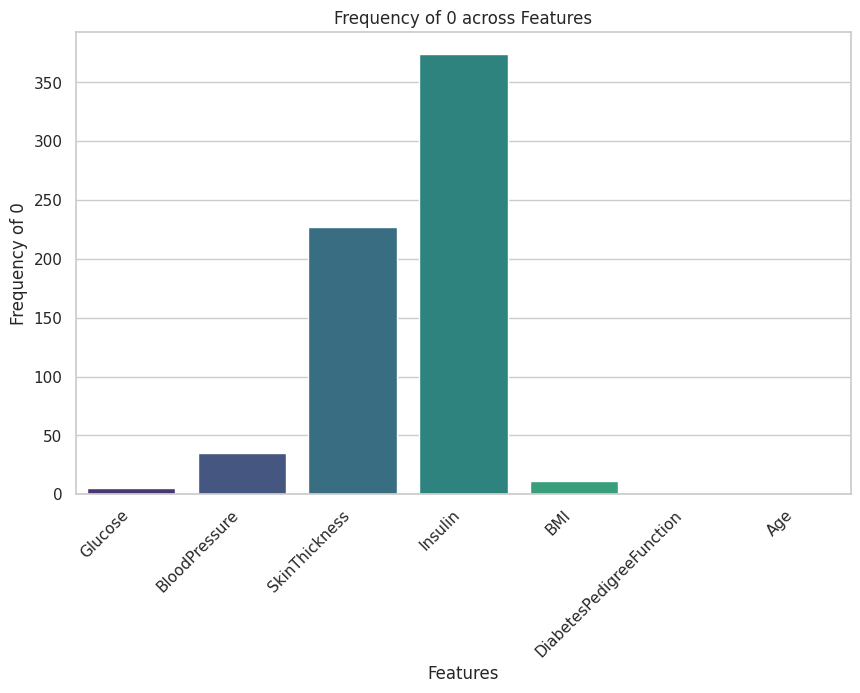

Missing Values Percentages:
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64


In [10]:
features_to_visualize = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Count the occurrences of 0 across features
# zero_counts = data.eq(0).sum()
zero_counts = data[features_to_visualize].eq(0).sum()

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=zero_counts.index, y=zero_counts.values, palette="viridis")

# Set labels and title
plt.xlabel("Features")
plt.ylabel("Frequency of 0")
plt.title("Frequency of 0 across Features")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

zero_percentages = (zero_counts/len(data))*100
print("Missing Values Percentages:")
print(zero_percentages)

## 2. Correlation Analysis

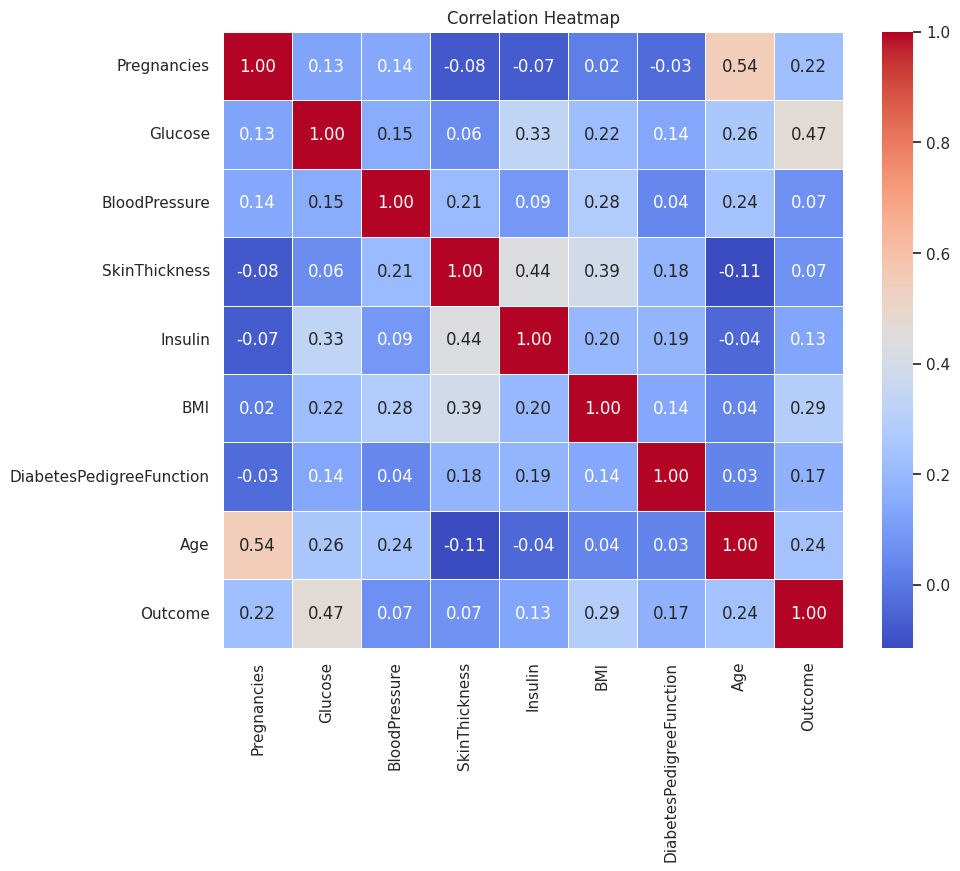

In [11]:
# Generate a correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title of the plot
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

# Cleaning the Dataset

## Replacing Missing Values with Median of Respective Features

We are replacing with Median because most of the features are in integer data type and by adding mean to the missing values will cause them to convert to float. Median is good option also because dataset show very little dispersion.

In [40]:
missing_vals_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[missing_vals_features] = data[missing_vals_features].replace(0, data[missing_vals_features].median())

In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


## Target Vairable Selection & Transforming the Dataset
**Reason:**

Since we are dealing with a dataset that shows certain circumstances lead to diagnosis of diabetes. So our target variable will be the **'Outcome'** column.

In [43]:
target_col = ["Outcome"]
cat_cols   = data.nunique()[data.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])

#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )

# #Scaling Numerical columns
# std = StandardScaler()
# scaled = std.fit_transform(data[num_cols])
# scaled = pd.DataFrame(scaled,columns=num_cols)

# #dropping original values merging scaled values for numerical columns
# df_data_og = data.copy()
# data = data.drop(columns = num_cols,axis = 1)
# data = data.merge(scaled,left_index=True,right_index=True,how = "left")

## Splitting Dataset into Train and Test

In [44]:
X = data.drop('Outcome',1)
y = data['Outcome']

print(len(X))
print(len(y))

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

768
768


<ipython-input-44-ac9350584e69>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('Outcome',1)


# Machine Learning

## 1. Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Without feature scaling:
Confusion Matrix:
 [[83 16]
 [19 36]]
Accuracy: 0.7727272727272727
Precision: 0.6923076923076923
Recall: 0.6545454545454545


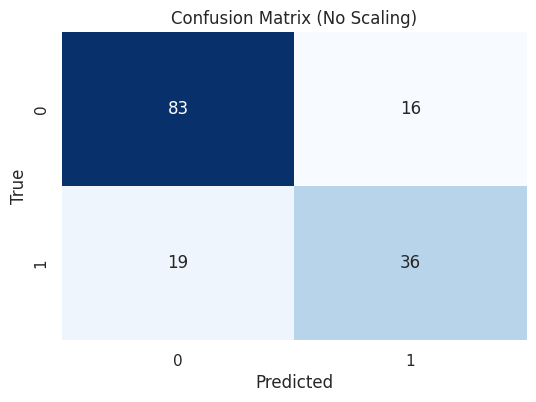


With only feature scaling:
Confusion Matrix:
 [[82 17]
 [19 36]]
Accuracy: 0.7662337662337663
Precision: 0.6792452830188679
Recall: 0.6545454545454545


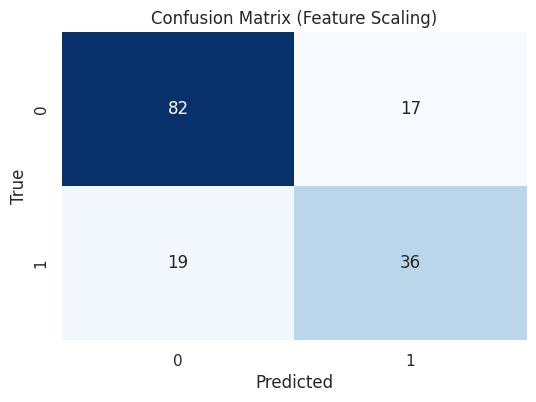


With both feature and target variable scaling:
Confusion Matrix:
 [[82 17]
 [19 36]]
Accuracy: 0.7662337662337663
Precision: 0.6792452830188679
Recall: 0.6545454545454545


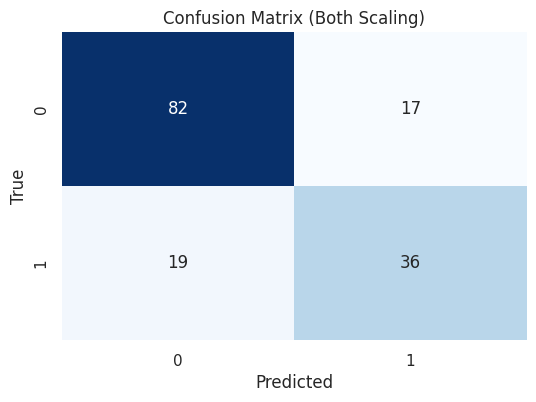

In [52]:
# Step 3: Logistic Regression without feature scaling
model_no_scaling = LogisticRegression()
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)

# Step 4: Confusion Matrix, Accuracy, Precision, and Recall without feature scaling
conf_matrix_no_scaling = confusion_matrix(y_test, y_pred_no_scaling)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
precision_no_scaling = precision_score(y_test, y_pred_no_scaling)
recall_no_scaling = recall_score(y_test, y_pred_no_scaling)

# Step 5: Logistic Regression with only feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_feature_scaling = LogisticRegression()
model_feature_scaling.fit(X_train_scaled, y_train)
y_pred_feature_scaling = model_feature_scaling.predict(X_test_scaled)

# Step 6: Confusion Matrix, Accuracy, Precision, and Recall with only feature scaling
conf_matrix_feature_scaling = confusion_matrix(y_test, y_pred_feature_scaling)
accuracy_feature_scaling = accuracy_score(y_test, y_pred_feature_scaling)
precision_feature_scaling = precision_score(y_test, y_pred_feature_scaling)
recall_feature_scaling = recall_score(y_test, y_pred_feature_scaling)

# Step 7: Logistic Regression with both feature and target variable scaling
scaler_target = StandardScaler()
y_train_scaled = scaler_target.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_target.transform(y_test.values.reshape(-1, 1)).ravel()
y_train_scaled = scaler_target.inverse_transform(y_train_scaled.reshape(-1, 1)).ravel()
y_test_scaled = scaler_target.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

model_both_scaling = LogisticRegression()
model_both_scaling.fit(X_train_scaled, y_train_scaled)
y_pred_both_scaling = model_both_scaling.predict(X_test_scaled)

# Step 8: Confusion Matrix, Accuracy, Precision, and Recall with both feature and target variable scaling
conf_matrix_both_scaling = confusion_matrix(y_test_scaled, y_pred_both_scaling)
accuracy_both_scaling = accuracy_score(y_test_scaled, y_pred_both_scaling)
precision_both_scaling = precision_score(y_test_scaled, y_pred_both_scaling)
recall_both_scaling = recall_score(y_test_scaled, y_pred_both_scaling)

# Function to create confusion matrix heatmap
def plot_confusion_matrix_heatmap(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


# Print the results
print("Without feature scaling:")
print("Confusion Matrix:\n", conf_matrix_no_scaling)
print("Accuracy:", accuracy_no_scaling)
print("Precision:", precision_no_scaling)
print("Recall:", recall_no_scaling)
# Plot confusion matrix for Logistic Regression without feature scaling
plot_confusion_matrix_heatmap(conf_matrix_no_scaling, "Confusion Matrix (No Scaling)")

print("\nWith only feature scaling:")
print("Confusion Matrix:\n", conf_matrix_feature_scaling)
print("Accuracy:", accuracy_feature_scaling)
print("Precision:", precision_feature_scaling)
print("Recall:", recall_feature_scaling)
# Plot confusion matrix for Logistic Regression with only feature scaling
plot_confusion_matrix_heatmap(conf_matrix_feature_scaling, "Confusion Matrix (Feature Scaling)")

print("\nWith both feature and target variable scaling:")
print("Confusion Matrix:\n", conf_matrix_both_scaling)
print("Accuracy:", accuracy_both_scaling)
print("Precision:", precision_both_scaling)
print("Recall:", recall_both_scaling)
# Plot confusion matrix for Logistic Regression with both feature and target variable scaling
plot_confusion_matrix_heatmap(conf_matrix_both_scaling, "Confusion Matrix (Both Scaling)")

## 2. Decision Tree Classifier

Without feature scaling:


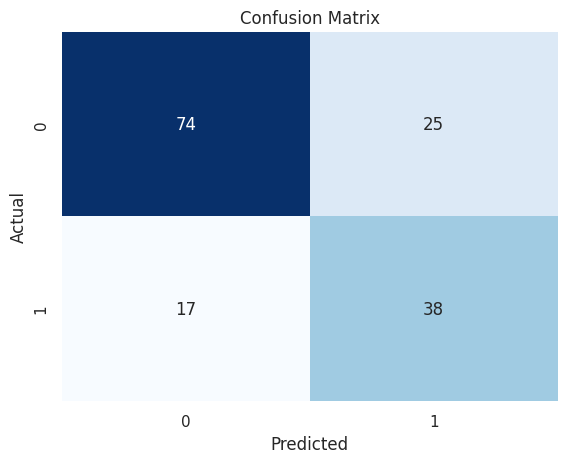

Accuracy: 0.7273
Precision: 0.6032
Recall: 0.6909

With only feature scaling:


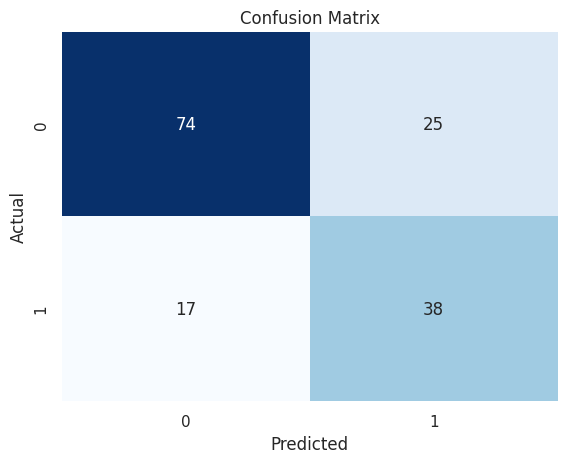

Accuracy: 0.7273
Precision: 0.6032
Recall: 0.6909

With feature and target variable scaling:


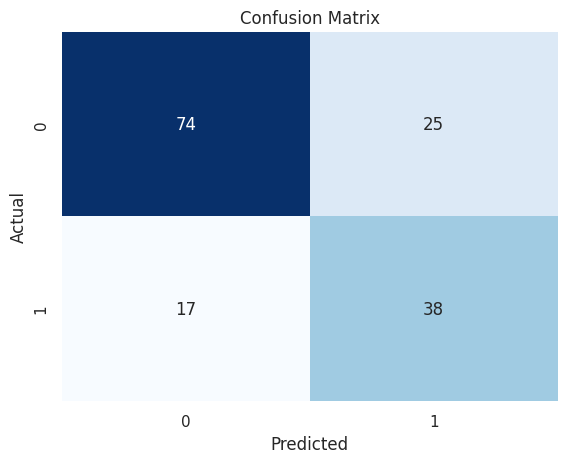

Accuracy: 0.7273
Precision: 0.6032
Recall: 0.6909


In [57]:
# Function to evaluate and print metrics
def evaluate_model(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)

    # Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Accuracy, Precision, Recall
    print(f'Accuracy: {acc:.4f}')
    print(f'Precision: {prec:.4f}')
    print(f'Recall: {rec:.4f}')

# Without feature scaling
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Without feature scaling:')
evaluate_model(y_test, y_pred)

# With only feature scaling (without target variable)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf.fit(X_train_scaled, y_train)
y_pred_scaled = clf.predict(X_test_scaled)
print('\nWith only feature scaling:')
evaluate_model(y_test, y_pred_scaled)

# With feature and target variable scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_train_scaled = scaler_target.inverse_transform(y_train_scaled.reshape(-1, 1)).ravel()

clf.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = clf.predict(X_test_scaled)
print('\nWith feature and target variable scaling:')
evaluate_model(y_test, y_pred_scaled)

## 3. Random Forest Classifier

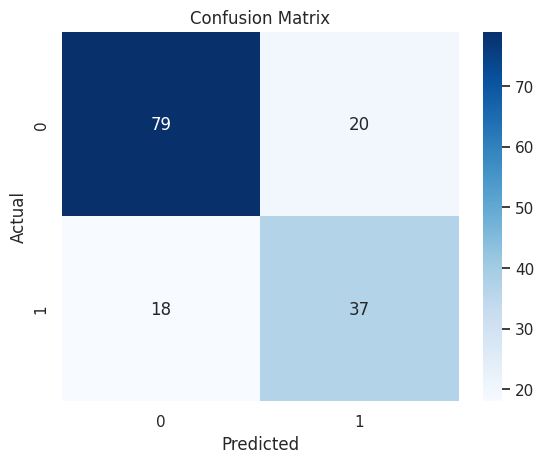

Accuracy: 0.75
Precision: 0.65
Recall: 0.67


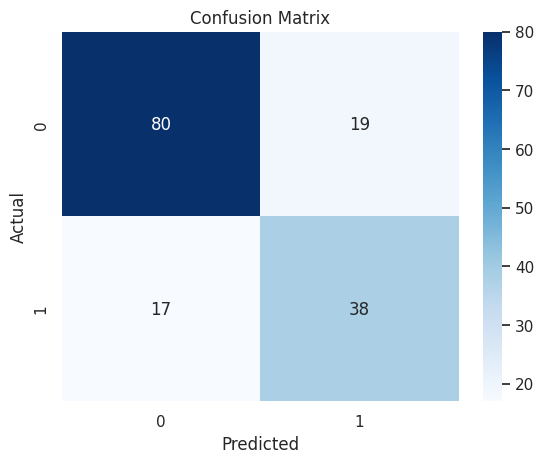

Accuracy: 0.77
Precision: 0.67
Recall: 0.69


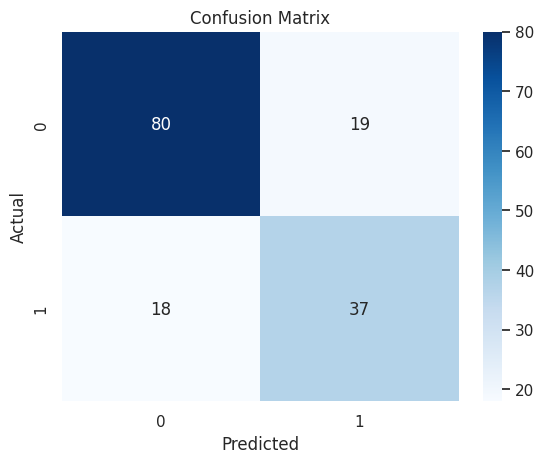

Accuracy: 0.76
Precision: 0.66
Recall: 0.67


In [62]:
# Function to evaluate the model and plot confusion matrix
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

# Without feature scaling
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test)

# With only feature scaling (without target variable)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model_scaled = RandomForestClassifier(random_state=42)
rf_model_scaled.fit(X_train_scaled, y_train)
evaluate_model(rf_model_scaled, X_test_scaled, y_test)

# With feature and target variable scaling
scaler_X_y = StandardScaler()
X_scaled = scaler_X_y.fit_transform(X)
y_scaled = (y - y.mean()) / y.std()  # Standardize target variable

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
y_train_scaled, y_test_scaled = y_train, y_test

rf_model_scaled_xy = RandomForestClassifier(random_state=42)
rf_model_scaled_xy.fit(X_train_scaled, y_train_scaled)
evaluate_model(rf_model_scaled_xy, X_test_scaled, y_test_scaled)

## 4. Gradient Boosting Classifier

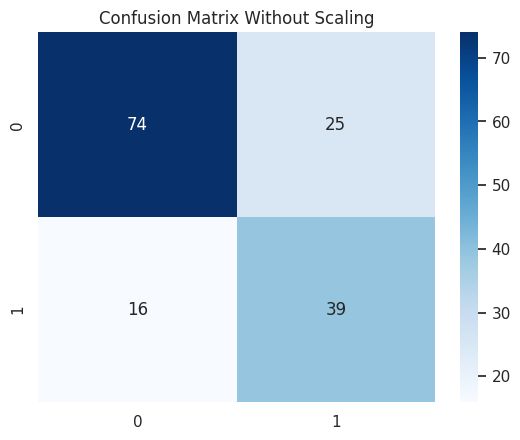

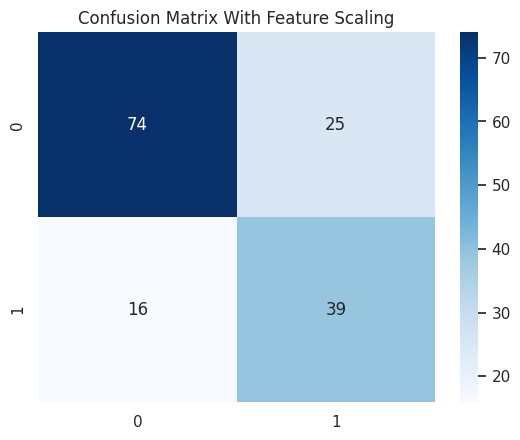

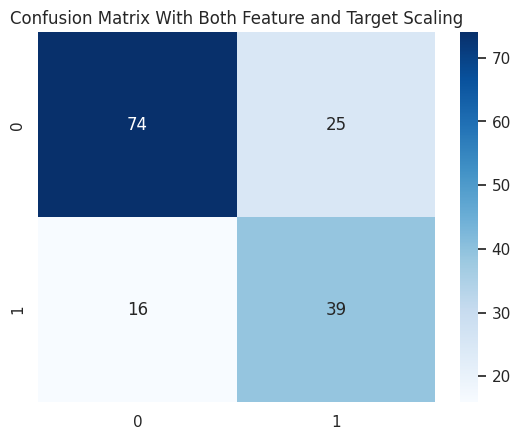

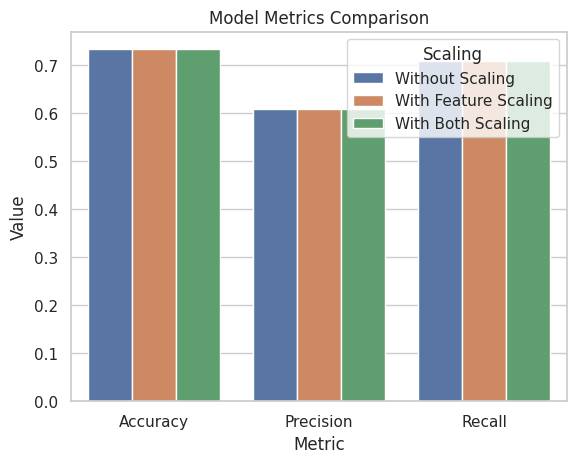

In [66]:
model_without_scaling = GradientBoostingClassifier()
model_without_scaling.fit(X_train, y_train)

# Predictions
y_pred_without_scaling = model_without_scaling.predict(X_test)

# Evaluate without scaling
conf_matrix_without_scaling = confusion_matrix(y_test, y_pred_without_scaling)
accuracy_without_scaling = accuracy_score(y_test, y_pred_without_scaling)
precision_without_scaling = precision_score(y_test, y_pred_without_scaling)
recall_without_scaling = recall_score(y_test, y_pred_without_scaling)

# Step 4: With only feature scaling (without target variable)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_with_feature_scaling = GradientBoostingClassifier()
model_with_feature_scaling.fit(X_train_scaled, y_train)

# Predictions
y_pred_with_feature_scaling = model_with_feature_scaling.predict(X_test_scaled)

# Evaluate with feature scaling
conf_matrix_with_feature_scaling = confusion_matrix(y_test, y_pred_with_feature_scaling)
accuracy_with_feature_scaling = accuracy_score(y_test, y_pred_with_feature_scaling)
precision_with_feature_scaling = precision_score(y_test, y_pred_with_feature_scaling)
recall_with_feature_scaling = recall_score(y_test, y_pred_with_feature_scaling)

# Step 5: With feature and target variable scaling
scaler_target = StandardScaler()
y_train_scaled = scaler_target.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_target.transform(y_test.values.reshape(-1, 1)).flatten()
y_train_scaled = scaler_target.inverse_transform(y_train_scaled.reshape(-1, 1)).ravel()
y_test_scaled = scaler_target.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

model_with_both_scaling = GradientBoostingClassifier()
model_with_both_scaling.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_with_both_scaling = model_with_both_scaling.predict(X_test_scaled)

# Evaluate with both feature and target variable scaling
conf_matrix_with_both_scaling = confusion_matrix(y_test_scaled, y_pred_with_both_scaling)
accuracy_with_both_scaling = accuracy_score(y_test_scaled, y_pred_with_both_scaling)
precision_with_both_scaling = precision_score(y_test_scaled, y_pred_with_both_scaling)
recall_with_both_scaling = recall_score(y_test_scaled, y_pred_with_both_scaling)

# Step 6: Visualization
# Confusion Matrix Heatmaps
sns.heatmap(conf_matrix_without_scaling, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Without Scaling')
plt.show()

sns.heatmap(conf_matrix_with_feature_scaling, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix With Feature Scaling')
plt.show()

sns.heatmap(conf_matrix_with_both_scaling, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix With Both Feature and Target Scaling')
plt.show()

# You can visualize other metrics as well, such as accuracy, precision, and recall.
# Visualization of Accuracy, Precision, and Recall
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Without Scaling': [accuracy_without_scaling, precision_without_scaling, recall_without_scaling],
    'With Feature Scaling': [accuracy_with_feature_scaling, precision_with_feature_scaling, recall_with_feature_scaling],
    'With Both Scaling': [accuracy_with_both_scaling, precision_with_both_scaling, recall_with_both_scaling]
})

# Melt the DataFrame for better visualization
melted_metrics_df = pd.melt(metrics_df, id_vars='Metric', var_name='Scaling', value_name='Value')

# Visualization using seaborn barplot
sns.barplot(x='Metric', y='Value', hue='Scaling', data=melted_metrics_df)
plt.title('Model Metrics Comparison')
plt.show()

# 2. What evaluation metric should we use and why provide the reason for that
**Answer:**

The choice of evaluation metrics depends on the specific characteristics of your classification problem and the business context. Here are some commonly used evaluation metrics and reasons for their use:

1. **Accuracy:**
   - **Metric:** Accuracy is the ratio of correctly predicted instances to the total instances.
   - **Use Case:** Accuracy is a general metric that is easy to understand and interpret. It is suitable when the class distribution is balanced. However, it may not be the best metric when dealing with imbalanced datasets.

2. **Precision:**
   - **Metric:** Precision is the ratio of correctly predicted positive observations to the total predicted positives.
   - **Use Case:** Precision is important when the cost of false positives is high. For example, in a spam email classifier, you want to minimize the number of legitimate emails being classified as spam.

3. **Recall (Sensitivity or True Positive Rate):**
   - **Metric:** Recall is the ratio of correctly predicted positive observations to the total actual positives.
   - **Use Case:** Recall is important when the cost of false negatives is high. For instance, in a medical diagnosis system, you want to minimize the number of actual positive cases being missed.

4. **F1 Score:**
   - **Metric:** The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
   - **Use Case:** F1 score is useful when there is an uneven class distribution or when both false positives and false negatives need to be minimized.

5. **Confusion Matrix:**
   - **Metric:** A confusion matrix provides a detailed breakdown of the model's performance, including true positives, true negatives, false positives, and false negatives.
   - **Use Case:** The confusion matrix is useful for gaining insights into where the model is making errors. It helps understand the balance between different types of errors.

6. **Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC):**
   - **Metric:** ROC curve is a graphical representation of the trade-off between true positive rate and false positive rate at various thresholds. AUC quantifies the overall performance of the classifier.
   - **Use Case:** ROC-AUC is suitable when you need to evaluate the model's ability to discriminate between positive and negative classes across different threshold settings.

The choice of metric ultimately depends on the specific goals and requirements of your problem. It's often advisable to consider multiple metrics and the business context to make a well-informed decision about model performance.